In [2]:
import pandas as pd
import numpy as np

# load data
data = pd.read_csv("stroke.csv")
data = data.drop("id", axis=1)

# check for null values
null_columns = data.columns[data.isnull().any()]
print(null_columns)

# impute null column with mean
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
print(data.info())

# split into X and y
y = data['stroke']
X = data.drop("stroke", axis=1)

Index(['bmi'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB
None


In [3]:
import matplotlib.pyplot as plt

# split into numerical and categorical
cols = X.columns
numerical = data[cols].select_dtypes(include=np.number)
categorical = data[cols].select_dtypes(include='object')

# print the seperated columns
print(numerical.columns)
print(categorical.columns)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')
Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


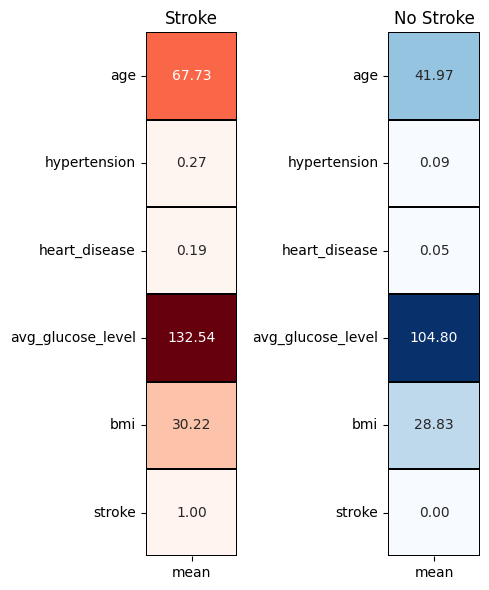

In [4]:
import seaborn as sns

# get values for the target variables
pos = data[data["stroke"] == 1].describe().T
neg = data[data["stroke"] == 0].describe().T

# define graphs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 6))

# heart disease heatmap
sns.heatmap(pos[['mean']], annot=True, cbar=False, fmt='.2f', ax=ax[0], cmap='Reds', linewidths = 1.2, linecolor = 'black')
ax[0].set_title('Stroke')

# no heart disease
sns.heatmap(neg[['mean']], annot=True, cbar=False, fmt='.2f', ax=ax[1], cmap='Blues', linewidths = 1.2, linecolor = 'black')
ax[1].set_title('No Stroke')

# adjust spacing
fig.tight_layout()
plt.show()

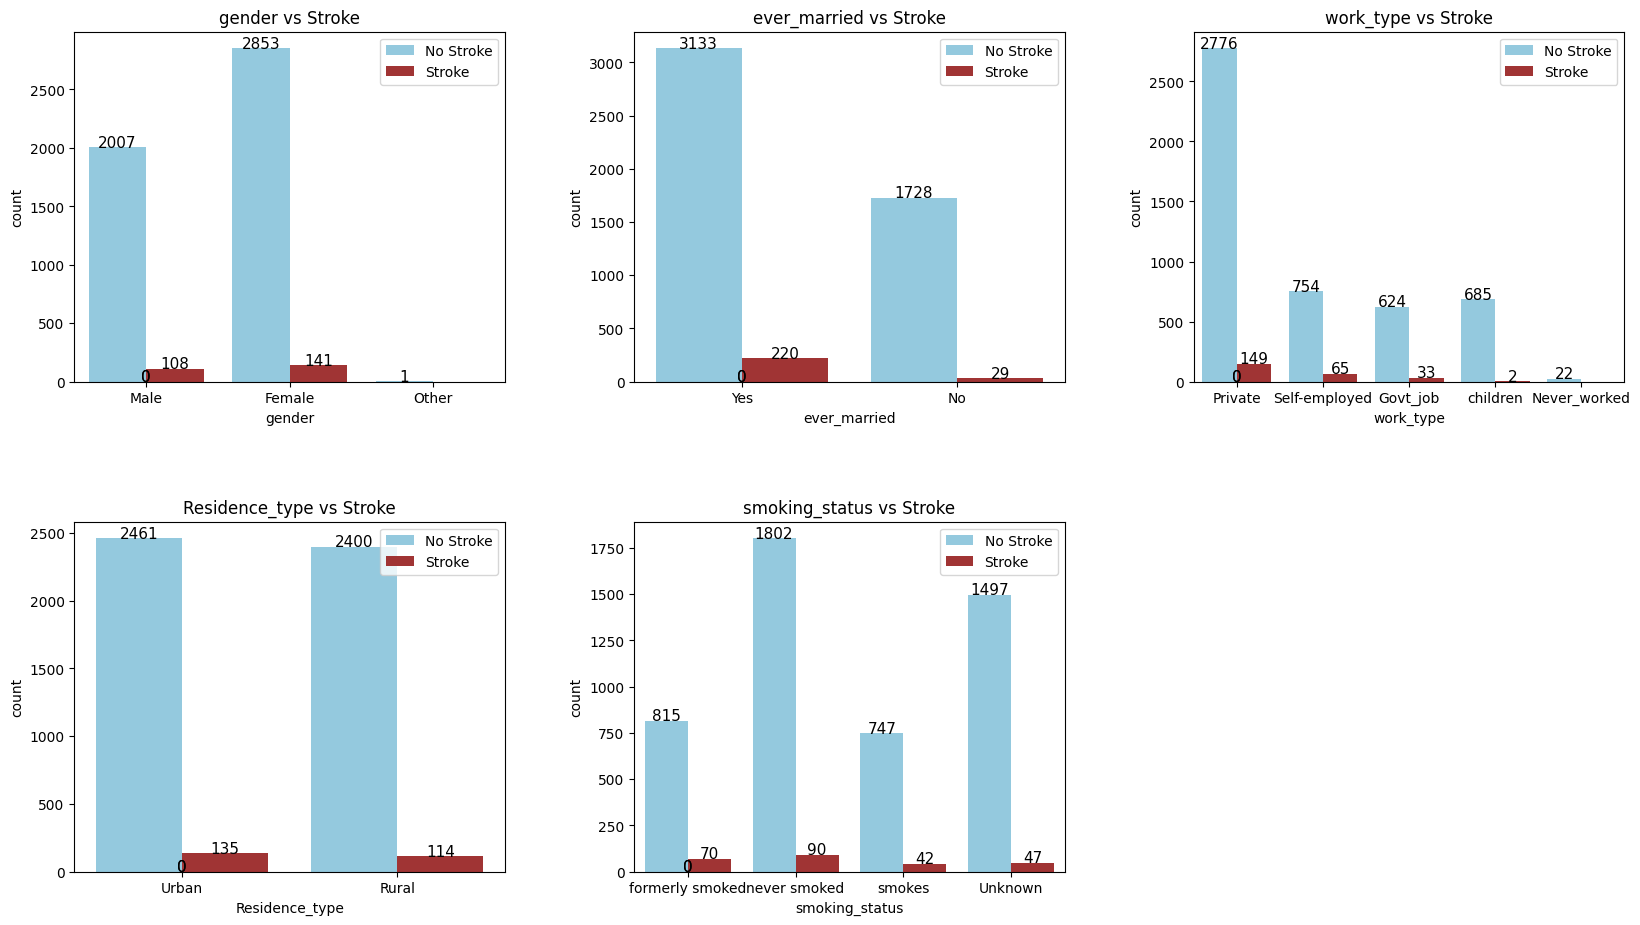

In [5]:
# define the categories
categories = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
colors = {0: "#87CEEB", 1: "#B22222"}

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axes = axes.flatten()

# Plot categorical features
for i in range(len(categories)):
    ax = axes[i]
    sns.countplot(x=categories[i], data=data, hue="stroke", palette=colors, ax=ax)
    
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, int(rect.get_height()), 
                horizontalalignment='center', fontsize=11)

    ax.set_title(f"{categories[i]} vs Stroke")
    ax.legend(['No Stroke', 'Stroke'])

axes[5].axis("off")

# Adjust layout
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.4, wspace=0.3)
plt.show()

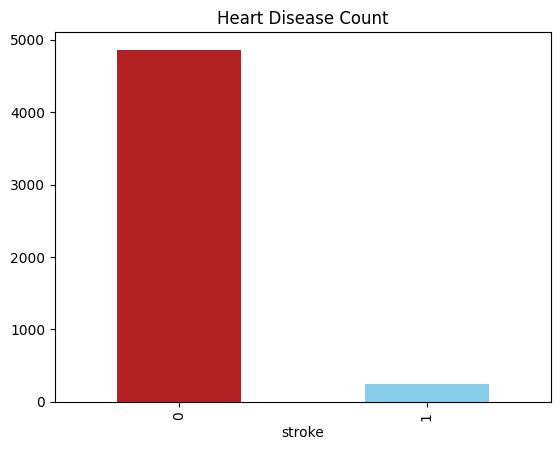

In [6]:
target = data['stroke']
colors = ['#B22222', '#87CEEB']
target.value_counts().plot(kind='bar', title='Heart Disease Count', color=colors)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Convert categorical to numerical columns
encoders = {}

for col in categories:
    le = LabelEncoder()
    le.fit(X[col])
    X[col] = le.transform(X[col])    
    encoders[col] = le

# train test split on the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# distribution of target variable
print("No rebalance:", sorted(Counter(y_train).items()))

# random under-sampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
print("Undersampled:", sorted(Counter(y_train_under).items()))

# random over-sampling
ros = RandomOverSampler(random_state=42)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
print("Oversampled:", sorted(Counter(y_train_over).items()))

No rebalance: [(0, 3889), (1, 199)]
Undersampled: [(0, 199), (1, 199)]
Oversampled: [(0, 3889), (1, 3889)]


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

# Logistic Regression (no rebalance)
lr = LogisticRegression(random_state=42, solver = "liblinear")
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# print results
print("Accuracy:", '{0:.3%}'.format(accuracy))
print("Precision:", '{0:.3%}'.format(precision))
print("Recall:", '{0:.3%}'.format(recall))
print("F1-Score:", '{0:.3%}'.format(f1))
print("AUC:", '{0:.3%}'.format(auc))

Accuracy: 95.108%
Precision: 0.000%
Recall: 0.000%
F1-Score: 0.000%
AUC: 83.251%


c:\Users\parth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Logistic Regression (under-sample)
lr.fit(X_train_under, y_train_under)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# print results
print("Accuracy:", '{0:.3%}'.format(accuracy))
print("Precision:", '{0:.3%}'.format(precision))
print("Recall:", '{0:.3%}'.format(recall))
print("F1-Score:", '{0:.3%}'.format(f1))
print("AUC:", '{0:.3%}'.format(auc))

Accuracy: 72.505%
Precision: 12.862%
Recall: 80.000%
F1-Score: 22.161%
AUC: 83.130%


In [11]:
# Logistic Regression (over-sample)
lr.fit(X_train_over, y_train_over)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

# metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

# print results
print("Accuracy:", '{0:.3%}'.format(accuracy))
print("Precision:", '{0:.3%}'.format(precision))
print("Recall:", '{0:.3%}'.format(recall))
print("F1-Score:", '{0:.3%}'.format(f1))
print("AUC:", '{0:.3%}'.format(auc))

Accuracy: 74.462%
Precision: 13.746%
Recall: 80.000%
F1-Score: 23.460%
AUC: 83.914%


In [14]:
# sample names
sample_names = ['sample_1', 'sample_2', 'sample_3', 'sample_4']

# sample data
samples = [
    pd.DataFrame([['Male',81,0,0,'Yes','Private','Urban',186.21,29,'formerly smoked']], columns=X.columns),  # 1
    pd.DataFrame([['Female',75,0,1,'Yes','Self-employed','Rural',243.53,27,'never smoked']], columns=X.columns),  # 0
    pd.DataFrame([['Male',47,0,0,'Yes','Private','Urban',86.94,41.1,'formerly smoked']], columns=X.columns),  # 1
    pd.DataFrame([['Male',71,0,0,'Yes','Private','Urban',198.21,27.3,'formerly smoked']], columns=X.columns)  # 0
]

# transform and predict the class for each sample
for name, sample in zip(sample_names, samples):
    for col in categories:
        le = encoders[col]
        sample[col] = le.transform(sample[col])

    # predict using the model
    prediction = lr.predict(sample)
    print(f"Prediction for {name}: {prediction}")

Prediction for sample_1: [1]
Prediction for sample_2: [1]
Prediction for sample_3: [0]
Prediction for sample_4: [1]
